In [80]:
from sklearn.datasets import make_regression
import numpy as np
from sklearn.model_selection import cross_val_score

In [3]:
X,y = make_regression(n_samples=4, n_features=1, n_informative=1, n_targets=1, noise=80, random_state=13)

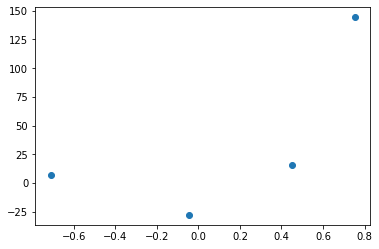

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [5]:
# Lets apply OLS

from sklearn.linear_model import LinearRegression

In [6]:
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [7]:
reg.coef_

array([78.35063668])

In [8]:
reg.intercept_

26.15963284313262

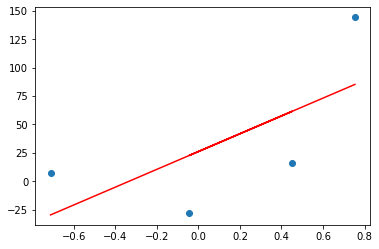

In [9]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X), color = 'red')

In [10]:
# Lets apply Gradient Descent assuming slope is constant m = 78.35
# and let's assume the starting value for intercept b = 0
y_pred =  ((78.35*X) + 0).reshape(4)

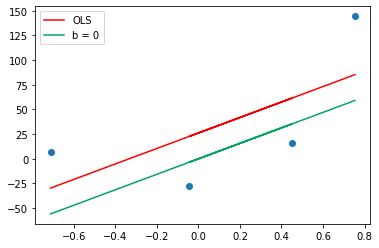

In [11]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X), color='red',label='OLS')
plt.plot(X,y_pred,color='#00a65a',label='b = 0')
plt.legend()
plt.show()

In [12]:
m = 78.35
b = 0

loss_slope = -2*np.sum(y-m*X.ravel() - b)
loss_slope

-209.27763408209216

In [13]:
# Lets take learning rate = 0.1
lr = 0.1

step_size = loss_slope*lr
step_size

-20.927763408209216

In [14]:
#Calculating the new intercept
b = b - step_size
b

20.927763408209216

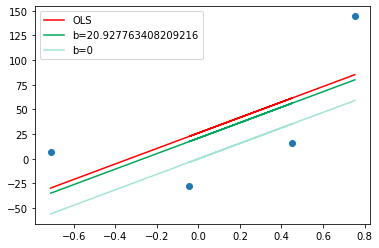

In [15]:
y_pred1 = ((78.35*X) + b).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X), color='red', label='OLS')
plt.plot(X,y_pred1, color='#00a65a', label='b={}'.format(b))
plt.plot(X,y_pred, color='#A3E4D7', label='b=0')
plt.legend()
plt.show()

In [16]:
# Iteration 2

loss_slope = -2*np.sum(y - m*X.ravel() - b)
loss_slope

-41.85552681641843

In [17]:
step_size = loss_slope*lr
step_size

-4.185552681641844

In [18]:
b = b - step_size
b

25.11331608985106

In [19]:
Y_pred2 = ((78.35*X) + b).reshape(4)

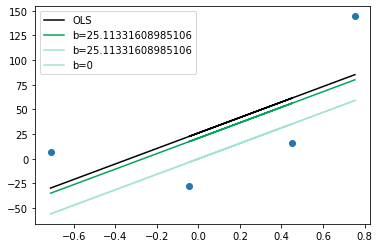

In [20]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X), color='black', label='OLS')
plt.plot(X,y_pred1, color='#00a65a', label='b={}'.format(b))
plt.plot(X,y_pred, color='#A3E4D7', label='b={}'.format(b))
plt.plot(X,y_pred, color='#A3E4D7', label='b=0')
plt.legend()
plt.show()

In [22]:
# Iteration 3
loss_slope = -2*np.sum(y - m*X.ravel() - b)
loss_slope

-8.371105363283675

In [23]:
step_size = loss_slope*lr
step_size

-0.8371105363283675

In [24]:
b = b - step_size
b

25.95042662617943

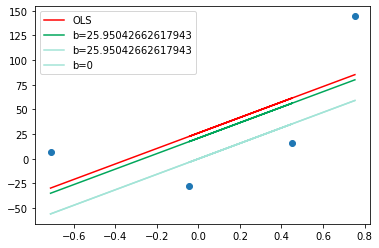

In [26]:
Y_pred3 = ((78.35*X) + b).reshape(4)
plt.scatter(X,y)
plt.plot(X,reg.predict(X), color='red', label='OLS')
plt.plot(X,y_pred1, color='#00a65a', label='b={}'.format(b))
plt.plot(X,y_pred, color='#A3E4D7', label='b={}'.format(b))
plt.plot(X,y_pred, color='#A3E4D7', label='b=0')
plt.legend()
plt.show()

In [27]:
# Iteration 4
loss_slope = -2*np.sum(y - m*X.ravel() - b)
loss_slope

-1.674221072656735

In [28]:
step_size = loss_slope*lr
step_size

-0.16742210726567353

In [29]:
b = b - step_size
b

26.1178487334451

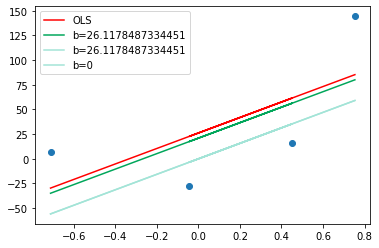

In [30]:
Y_pred4 = ((78.35*X) + b).reshape(4)
plt.scatter(X,y)
plt.plot(X,reg.predict(X), color='red', label='OLS')
plt.plot(X,y_pred1, color='#00a65a', label='b={}'.format(b))
plt.plot(X,y_pred, color='#A3E4D7', label='b={}'.format(b))
plt.plot(X,y_pred, color='#A3E4D7', label='b=0')
plt.legend()
plt.show()

In [31]:
# Iteration 5
loss_slope = -2*np.sum(y - m*X.ravel() - b)
loss_slope

-0.3348442145313584

In [32]:
step_size = loss_slope*lr
step_size

-0.03348442145313584

In [33]:
b = b - step_size
b

26.151333154898236

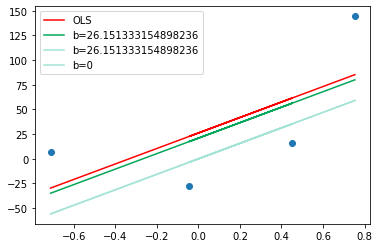

In [34]:
Y_pred5 = ((78.35*X) + b).reshape(4)
plt.scatter(X,y)
plt.plot(X,reg.predict(X), color='red', label='OLS')
plt.plot(X,y_pred1, color='#00a65a', label='b={}'.format(b))
plt.plot(X,y_pred, color='#A3E4D7', label='b={}'.format(b))
plt.plot(X,y_pred, color='#A3E4D7', label='b=0')
plt.legend()
plt.show()

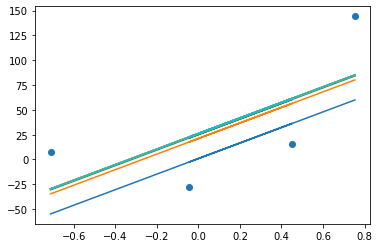

In [35]:
# Making all these things in loops

b = -100
m = 78.35
lr = 0.1

epochs = 10

for i in range(epochs):
    loss_slope = -2*np.sum(y - m*X.ravel() - b)
    b = b - (lr*loss_slope)
    
    y_pred = m*X + b
    
    plt.plot(X,y_pred)
    
plt.scatter(X,y)

# Logic to calculate b(slope) in the code

In [40]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [37]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20)

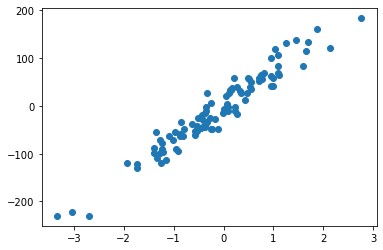

In [38]:
plt.scatter(X,y)

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lr = LinearRegression()

In [45]:
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[72.99761627]
0.6784831687467605


In [ ]:
m = 72.99

# Making our own slope

In [62]:
class GDRegressor:
    
    def __init__(self, learning_rate,epochs):
        self.m = 72.99
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
        
    
    def fit(self,X,y):
        #calculate the  b using GD
        for i in range(self.epochs):
            loss_slope = - 2*np.sum(y - self.m*X.ravel() - self.b)
            self.b = self.b - (self.lr*loss_slope)
            print(loss_slope,self.b)
        print(self.b)

In [67]:
gd = GDRegressor(0.001,100)

In [68]:
gd.fit(X,y)

-24135.52268178705 -95.86447731821295
-19308.41814542964 -76.5560591727833
-15446.734516343713 -61.1093246564396
-12357.387613074967 -48.75193704336463
-9885.910090459973 -38.866026952904654
-7908.72807236798 -30.957298880536676
-6326.982457894384 -24.63031642264229
-5061.585966315505 -19.568730456326787
-4049.268773052406 -15.51946168327438
-3239.4150184419236 -12.280046664832458
-2591.5320147535394 -9.688514650078918
-2073.2256118028317 -7.615289038276087
-1658.5804894422656 -5.956708548833822
-1326.8643915538128 -4.629844157280009
-1061.4915132430501 -3.568352644036959
-849.19321059444 -2.7191594334425186
-679.3545684755521 -2.0398048649669667
-543.4836547804417 -1.496321210186525
-434.7869238243534 -1.0615342863621717
-347.8295390594828 -0.713704747302689
-278.263631247586 -0.435441116055103
-222.61090499806878 -0.2128302110570342
-178.08872399845504 -0.03474148705857916
-142.4709791987642 0.10772949214018507
-113.97678335901132 0.2217062754991964
-91.181426687209 0.312887702186405

# Calculating for m and improving the code more

In [70]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=13)

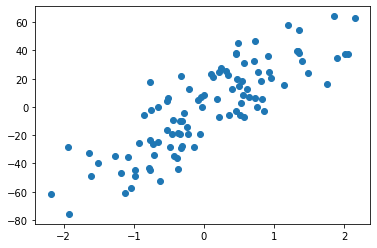

In [71]:
plt.scatter(X,y)

In [109]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
lr = LinearRegression()

In [112]:
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[28.12597332]
-2.271014426178382


In [114]:
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6345158782661013

In [115]:
class GDRegressor:
    
    def __init__(self, learning_rate,epochs):
        self.m =  100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
        
    
    def fit(self,X,y):
        #calculate the  b using GD
        for i in range(self.epochs):
            loss_slope_b = - 2*np.sum(y - self.m*X.ravel() - self.b)
            loss_slope_m = - 2*np.sum((y - self.m*X.ravel() - self.b)*X.ravel())
            
            self.b = self.b - (self.lr*loss_slope_b)
            self.m = self.m - (self.lr*loss_slope_m)                         
        print(self.m,self.b)
        
    def predict(self,X):
        return self.m*X + self.b

In [116]:
gd = GDRegressor(0.001,50)

In [117]:
gd.fit(X_train,y_train)

28.159367347119066 -2.3004574196824854


In [118]:
gd.predict(X_train)

array([[-35.68110113],
       [  8.88560702],
       [-11.23446644],
       [ 31.22904975],
       [ 18.92512693],
       [ 21.95071003],
       [-48.4562909 ],
       [-30.0138024 ],
       [-12.72269202],
       [ 50.99796601],
       [-56.48357018],
       [-14.61020252],
       [-47.78087586],
       [ 23.42990275],
       [  3.82284374],
       [ 35.72330515],
       [ -9.15237073],
       [ 11.52218283],
       [ 55.53024484],
       [ 54.44688608],
       [  3.55106062],
       [-24.11439386],
       [ 13.12857554],
       [ 11.81125176],
       [-11.16666165],
       [ 10.46928178],
       [ 46.95708473],
       [-11.83573323],
       [ -3.55363595],
       [ 35.71997964],
       [-14.40608727],
       [ 49.78346228],
       [  7.82374456],
       [ 10.81217647],
       [ -4.59971358],
       [ -2.36773087],
       [ 13.5998501 ],
       [ 23.67217027],
       [-33.85322203],
       [-22.60335208],
       [  6.63594379],
       [-57.08142825],
       [  7.52013867],
       [-11

In [120]:
y_pred = gd.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6343842836315579

In [123]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

In [124]:
b = -520
m = 600
lr = 0.001
all_b = []
all_m = []
all_cost = []

epochs = 30

for i in range(epochs):
    slope_b = 0
    slope_m = 0
    cost = 0
    for j in range(X.shape[0]):
        slope_b = slope_b - 2*(y[j] - (m * X[j]) -  b)
        slope_m = slope_m - 2*(y[j] - (m * X[j]) -  b)*X[j]
        cost = cost + (y[j] - m * X[j] -b) ** 2

    b = b - (lr * slope_b)
    m = m - (lr * slope_m)
    all_b.append(b)
    all_m.append(m)
    all_cost.append(cost)

<IPython.core.display.Javascript object>


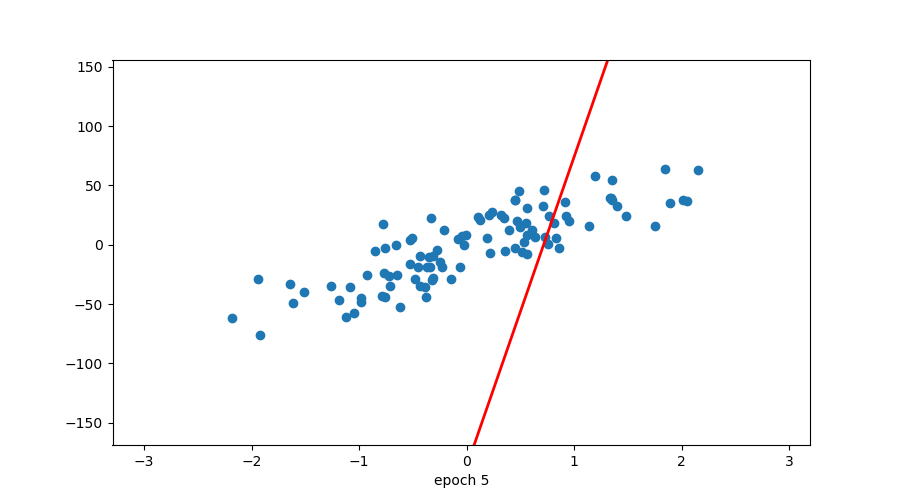

In [125]:
fig, ax = plt.subplots(figsize=(9,5))
#fig.set_tight_layout(True)

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*(-27) -150
ax.scatter(X, y)
line, = ax.plot(x_i, x_i*50 - 4, 'r-', linewidth=2)

def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*all_m[i] + all_b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=epochs, interval=500)

#f = r"animation4.gif" 
#writergif = animation.PillowWriter(fps=2) 
#anim.save(f, writer=writergif)